In [4]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.style.use("seaborn")

In [33]:
X,Y=make_circles(n_samples=500,noise=0.02)

X.shape,Y.shape

((500, 2), (500,))

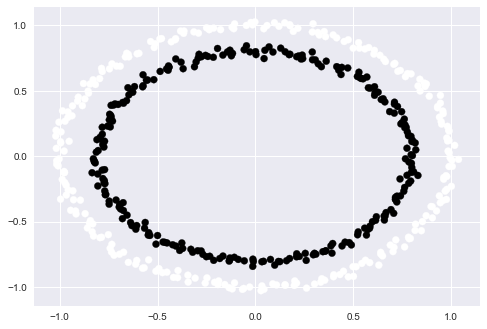

In [34]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [35]:
def phi(X):
    '''Non linear Transformation'''
    X1=X[:,0]
    X2=X[:,1]
    X3=X1**2+X2**2
    f=np.zeros((X.shape[0],3))
    f[:,:-1]=X
    f[:,-1]=X3
    return f

In [36]:
X2=phi(X)
X2.shape

(500, 3)

In [37]:
print(X2[:3,:])

[[-0.54559372 -0.79234175  0.92547796]
 [ 0.09780396  1.01823146  1.04636093]
 [ 0.70755429 -0.43687177  0.69149001]]


In [38]:
print(X[:3,:])

[[-0.54559372 -0.79234175]
 [ 0.09780396  1.01823146]
 [ 0.70755429 -0.43687177]]


In [72]:
def plot3D(X,Y,show=True):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    X1=X[:,0]
    X2=X[:,1]
    X3=X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    if show==True:
        plt.show()
    
    return ax

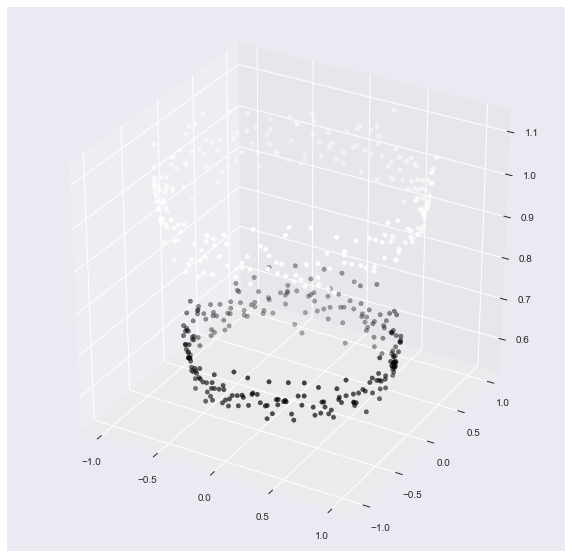

In [73]:
plot3D(X2,Y)

## Logistic Classifier

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [75]:
lr=LogisticRegression()

In [76]:
cvs=cross_val_score(lr,X,Y,cv=5).mean()
print("accuracy on 2d X ",cvs*100)

accuracy on 2d X  45.199999999999996


In [77]:
cvs=cross_val_score(lr,X2,Y,cv=5).mean()
print("accuracy on 3d X ",cvs*100)

accuracy on 3d X  100.0


### Visualize the Decision Surface

In [78]:
lr.fit(X2,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
wts=lr.coef_
wts

array([[-2.65713864e-02, -3.21074822e-03, -1.08848704e+01]])

In [80]:
bias=lr.intercept_
bias

array([8.9537143])

In [81]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx,yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]] [[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [82]:
z=-(wts[0,0]*xx+wts[0,1]*yy+bias)/wts[0,2]
z

array([[0.82805566, 0.82561453, 0.8231734 , 0.82073227],
       [0.82776069, 0.82531956, 0.82287843, 0.8204373 ],
       [0.82746571, 0.82502458, 0.82258345, 0.82014232],
       [0.82717074, 0.82472961, 0.82228848, 0.81984735]])

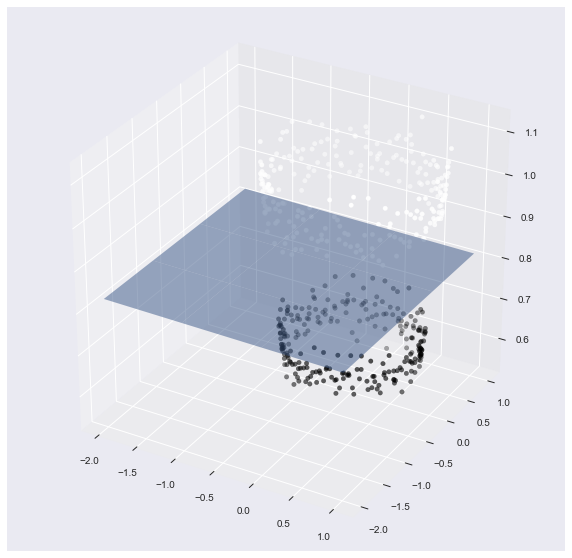

In [85]:
ax=plot3D(X2,Y,False)
ax.plot_surface(xx,yy,z,alpha=0.5)
plt.show()